#Question 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/CV/Question 1

/content/drive/MyDrive/CV/Question 1


Processing 2.jpeg...


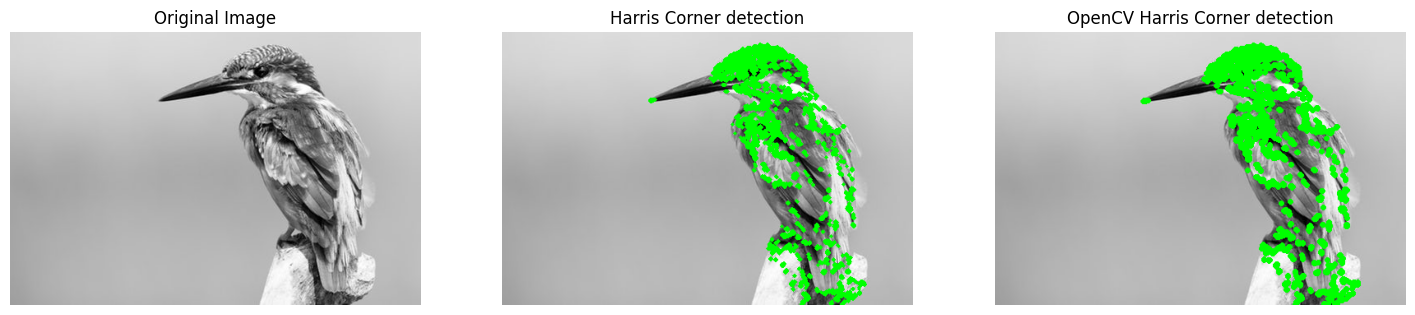

Processing 9.jpeg...


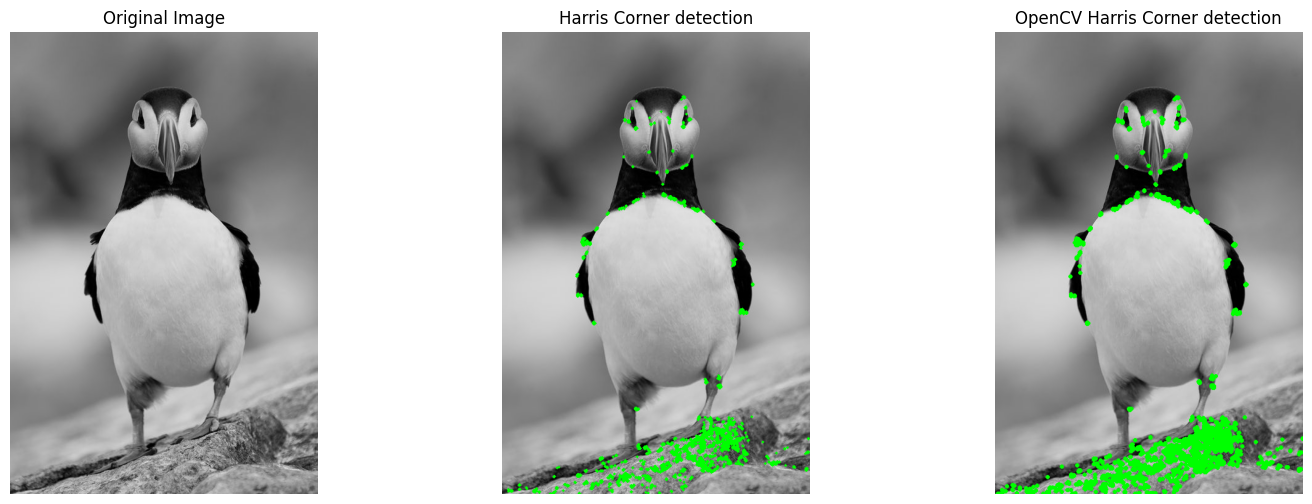

Processing 5.jpg...


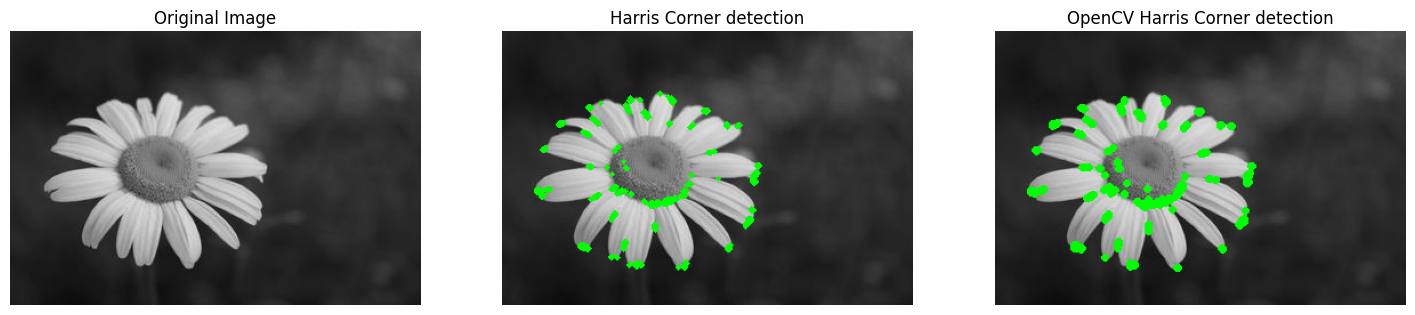

Processing 3.png...


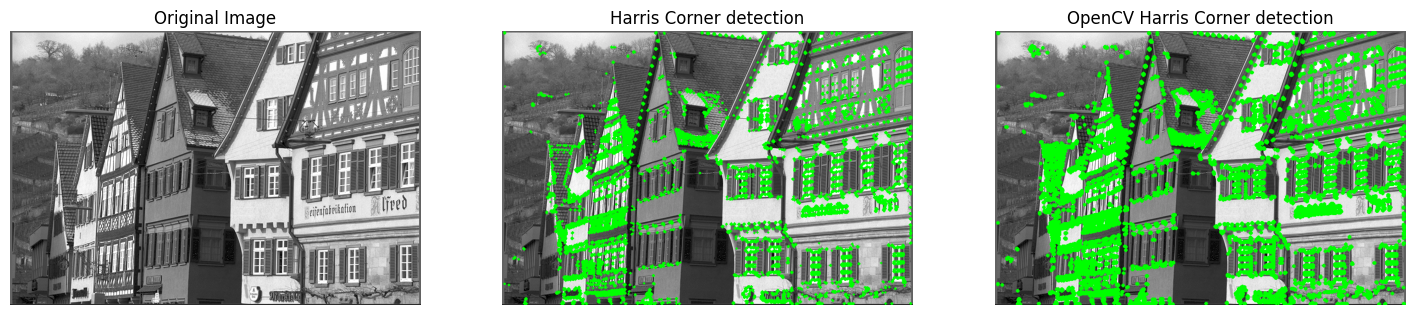

Processing 6.jpg...


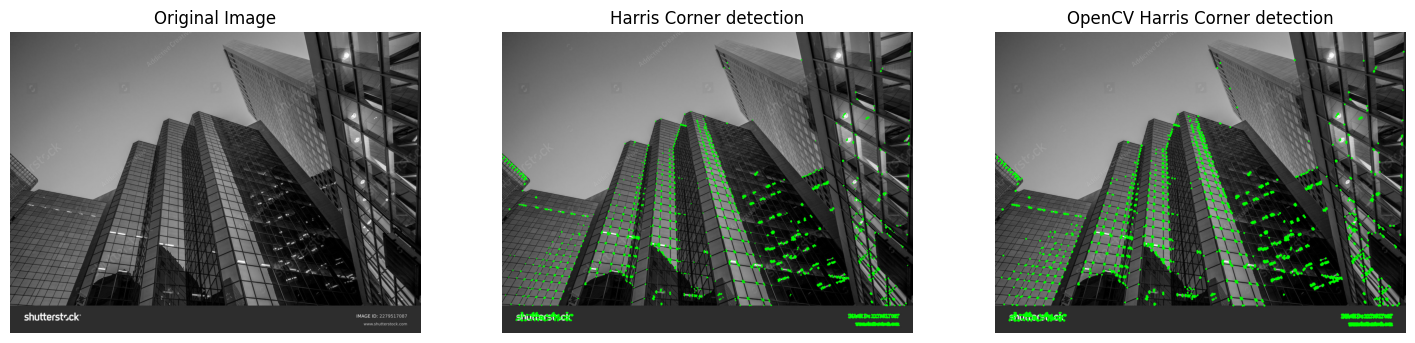

Processing 7.jpg...


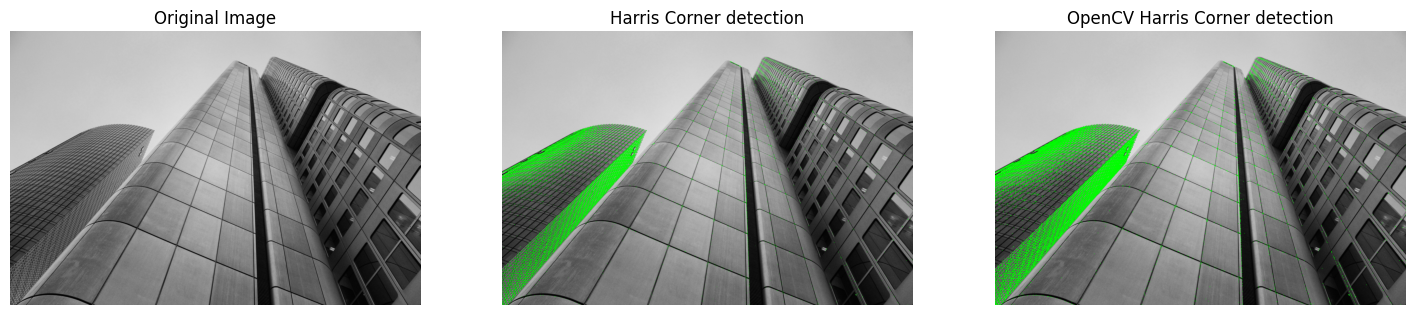

Processing 8.jpg...


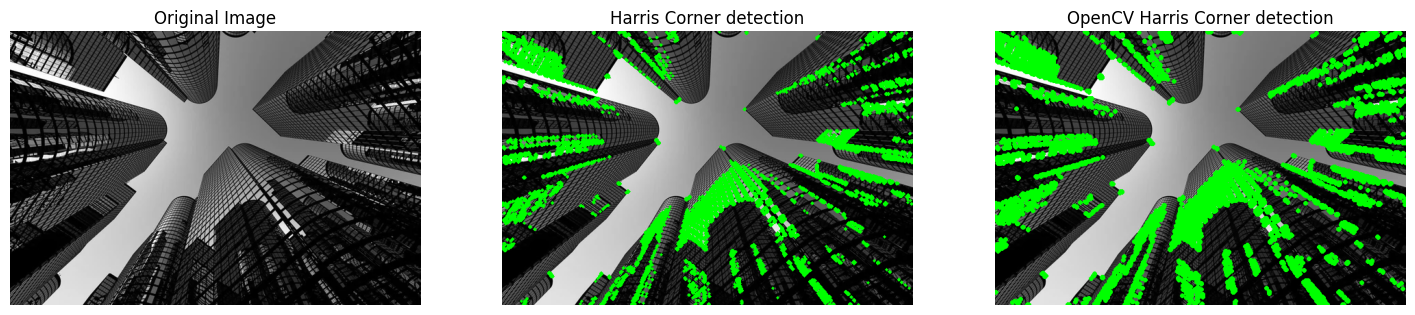

Processing 10.jpg...


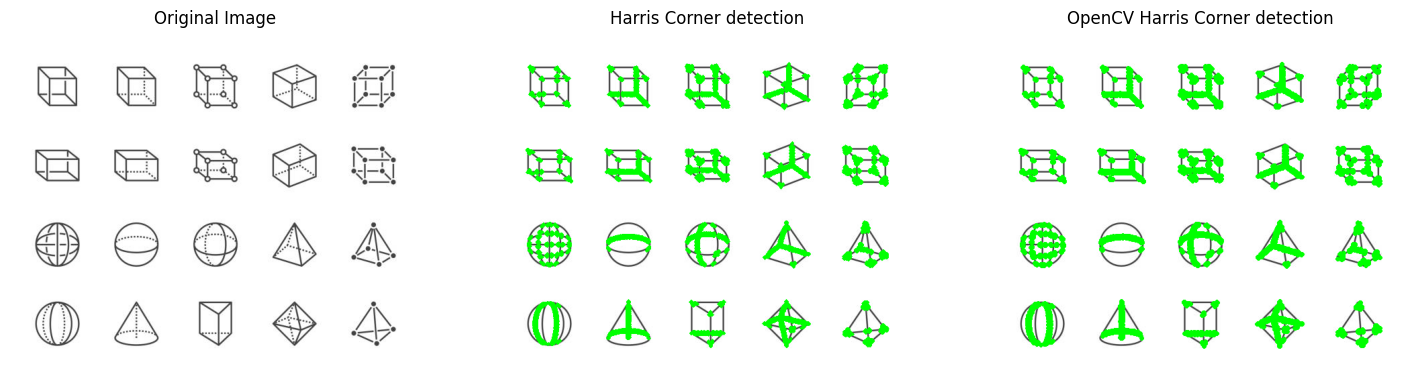

Processing 11.jpg...


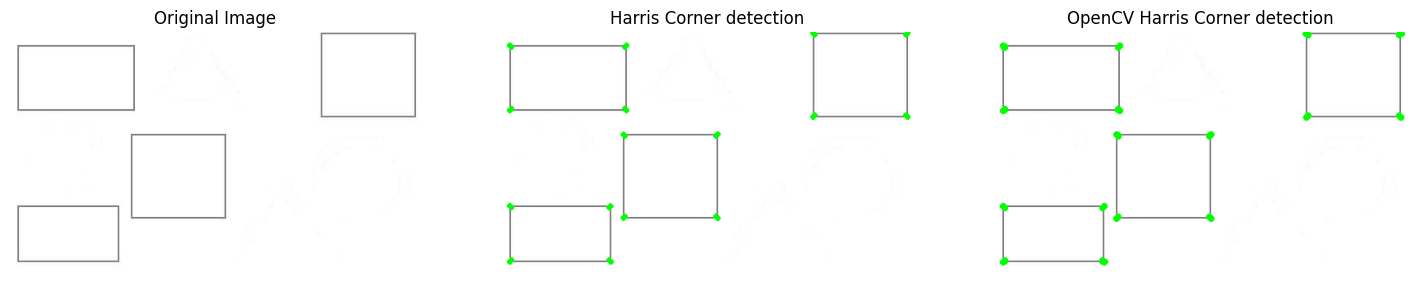

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

def gaussian_kernel(size=3, sigma=1):
    kernel1D = np.linspace(-(size // 2), size // 2, size)
    kernel2D = np.outer(np.exp(-0.5 * (kernel1D / sigma) ** 2), np.exp(-0.5 * (kernel1D / sigma) ** 2))
    kernel2D /= 2 * np.pi * sigma * sigma
    return kernel2D

def apply_sobel_operator(image):
    # Applying Sobel operator to compute gradients in both x and y directions
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
    Ix = convolve2d(image, Kx, boundary='symm', mode='same')
    Iy = convolve2d(image, Ky, boundary='symm', mode='same')
    return Ix, Iy

def detect_harris_corners(image_path, k=0.04, threshold_ratio=0.01):
    # Loading the image and applying Sobel operator for to compute gradient
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    Ix, Iy = apply_sobel_operator(image)

    Ixx = convolve2d(Ix**2, gaussian_kernel(), boundary='symm', mode='same')
    Iyy = convolve2d(Iy**2, gaussian_kernel(), boundary='symm', mode='same')
    Ixy = convolve2d(Ix*Iy, gaussian_kernel(), boundary='symm', mode='same')

    # Computing Harris response
    detM = Ixx * Iyy - Ixy ** 2
    traceM = Ixx + Iyy
    R = detM - k * traceM ** 2

    # Thresholding to find corners
    corners = np.argwhere(R > np.max(R) * threshold_ratio)

    # Marking corners on the image
    image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for y, x in corners:
        cv2.circle(image_with_corners, (x, y), 2, (0, 255, 0), -1)

    return image_with_corners

def process_images_from_folder(folder_path):

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            print(f"Processing {filename}...")

            #  Harris Corner Detection from scratch
            custom_corners = detect_harris_corners(image_path)
            original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Display the image with corners
            plt.figure(figsize=(18, 6))

            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR))
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(custom_corners)
            plt.title('Harris Corner detection')
            plt.axis('off')

            # OpenCV Harris Corner Detection
            image = np.copy(original_image)
            opencv_corners = cv2.cornerHarris(original_image, 2, 3, 0.04)
            opencv_corners = cv2.dilate(opencv_corners, None)


            image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


            threshold = 0.01 * opencv_corners.max()
            y_indices, x_indices = np.where(opencv_corners > threshold)
            for y, x in zip(y_indices, x_indices):
                cv2.circle(image_bgr, (x, y), 2, (0, 255, 0), -1)

            plt.subplot(1, 3, 3)
            plt.imshow(image_bgr)
            plt.title('OpenCV Harris Corner detection')
            plt.axis('off')

            plt.show()

folder_path = '/content/drive/MyDrive/CV/Question 1'
process_images_from_folder(folder_path)
